In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import Gradien tBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
fileName = 'data1.mat'
data_base = loadmat(fileName)
data_base

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

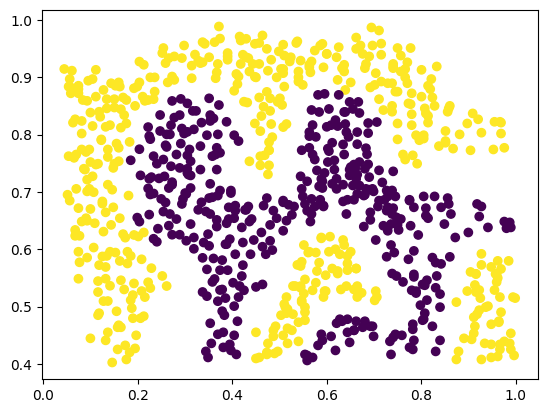

In [3]:
plt.scatter(data_base["X"][:,0],data_base["X"][:,1],c=data_base['y'])
data_train,data_test = train_test_split(np.hstack((data_base['X'],data_base['y'])),test_size=0.3,random_state=True)

In [43]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(data_train[:,:2],data_train[:,2])
clf.score(data_test[:,:2],data_test[:,2])

0.8764478764478765

In [59]:
n_estimators_all = np.arange(1,300,step = 10)
scores = []

for j in n_estimators_all:
    clf = AdaBoostClassifier(n_estimators=j,algorithm='SAMME.R')
    clf.fit(data_train[:,:2],data_train[:,2])
    score = clf.score(data_test[:,:2],data_test[:,2])
    scores.append([j,score])
scores

[[1, 0.6177606177606177],
 [11, 0.888030888030888],
 [21, 0.9034749034749034],
 [31, 0.8996138996138996],
 [41, 0.8841698841698842],
 [51, 0.8918918918918919],
 [61, 0.8648648648648649],
 [71, 0.8725868725868726],
 [81, 0.8764478764478765],
 [91, 0.8687258687258688],
 [101, 0.8687258687258688],
 [111, 0.8648648648648649],
 [121, 0.8803088803088803],
 [131, 0.8803088803088803],
 [141, 0.861003861003861],
 [151, 0.861003861003861],
 [161, 0.8532818532818532],
 [171, 0.8725868725868726],
 [181, 0.8494208494208494],
 [191, 0.8494208494208494],
 [201, 0.8532818532818532],
 [211, 0.8532818532818532],
 [221, 0.8571428571428571],
 [231, 0.8571428571428571],
 [241, 0.8571428571428571],
 [251, 0.861003861003861],
 [261, 0.8648648648648649],
 [271, 0.8648648648648649],
 [281, 0.861003861003861],
 [291, 0.8648648648648649]]

In [50]:
scores1 = []

for j in n_estimators_all:
    clf = GradientBoostingClassifier(n_estimators=j)
    clf.fit(data_train[:,:2],data_train[:,2])
    score = clf.score(data_test[:,:2],data_test[:,2])
    scores1.append([j,score])
scores1

[[1, 0.5791505791505791],
 [11, 0.833976833976834],
 [21, 0.8841698841698842],
 [31, 0.915057915057915],
 [41, 0.9420849420849421],
 [51, 0.9420849420849421],
 [61, 0.9420849420849421],
 [71, 0.9498069498069498],
 [81, 0.9498069498069498],
 [91, 0.9536679536679536],
 [101, 0.9691119691119691],
 [111, 0.9768339768339769],
 [121, 0.9768339768339769],
 [131, 0.9806949806949807],
 [141, 0.9806949806949807],
 [151, 0.9806949806949807],
 [161, 0.9768339768339769],
 [171, 0.9768339768339769],
 [181, 0.9768339768339769],
 [191, 0.9768339768339769],
 [201, 0.9806949806949807],
 [211, 0.9884169884169884],
 [221, 0.9845559845559846],
 [231, 0.9845559845559846],
 [241, 0.9845559845559846],
 [251, 0.9884169884169884],
 [261, 0.9806949806949807],
 [271, 0.9806949806949807],
 [281, 0.9806949806949807],
 [291, 0.9806949806949807]]

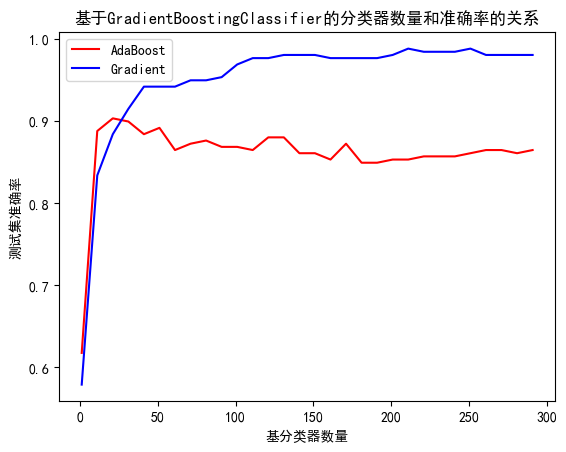

In [54]:
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
from pylab import *
font = FontProperties(fname=r"simsun.ttf",size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']
scores = np.array(scores)
plt.plot(scores[:,0],scores[:,1],c = 'r')
plt.title("基于AdaBoostClassifier的分类器数量和准确率的关系")
plt.xlabel(u'基分类器数量',)
plt.ylabel(u'测试集准确率')

scores1 = np.array(scores1)
plt.plot(scores1[:,0],scores1[:,1],c = 'b')
plt.title("基于GradientBoostingClassifier的分类器数量和准确率的关系")
plt.xlabel(u'基分类器数量',)
plt.ylabel(u'测试集准确率')

plt.legend(['AdaBoost','Gradient'])

Text(0, 0.5, '测试集准确率')

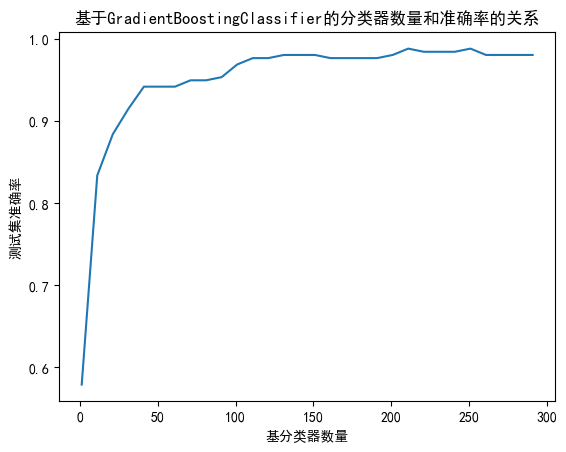

In [51]:
font = FontProperties(fname=r"simsun.ttf",size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']


1.0

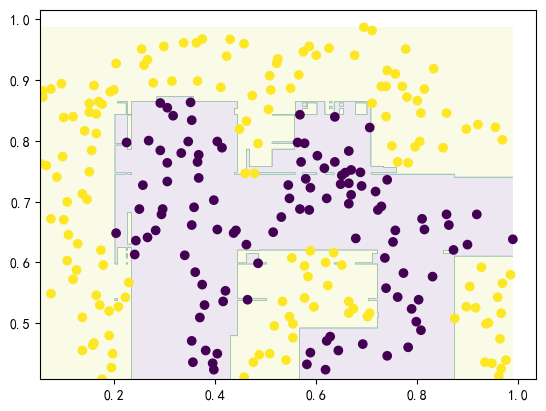

In [55]:
clf = GradientBoostingClassifier(n_estimators=211)
clf.fit(data_test[:,:2],data_test[:,2])

arr1 = np.arange(data_test[:,0].min(), data_test[:,0].max(), 0.001)
arr2 = np.arange(data_test[:,1].min(), data_test[:,1].max(), 0.001)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = clf.predict(input_array)

plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(data_test[:,0],data_test[:,1],c=data_test[:,2])
clf.score(data_test[:,:2],data_test[:,2])